<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/12_2_Early_stopping_in_Neural_Networks_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %tensorflow_version 1.x

# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Early Stopping

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Compiling the model</ol>
<ol>6. Setting up Early Stopping</ol>
<ol>7. Training the model using Early Stopping</ol>
<ol>8. Evaluating model performance</ol>

## 1. Loading the dataset

In [19]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# unzipping the Dataset.zip file
!unzip /content/drive/MyDrive/Dataset.zip

In [5]:
# reading the csv file
data = pd.read_csv('/content/emergency_classification.csv')

In [6]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [20]:
# distribution of classes in the dataset
data['emergency_or_not'].value_counts()

emergency_or_not
0    1361
1     991
Name: count, dtype: int64

In [8]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [9]:
! ls /content/drive/MyDrive/DeepLEarning/images |wc -l

2352


In [10]:
import glob
image_files = glob.glob('/content/drive/MyDrive/DeepLEarning/images/*.jpg')
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in image_files:
    # loading the image using its name
    img = plt.imread(img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [11]:
# shape of the images (number, height, weight, channels)
X.shape

(2352, 224, 224, 3)

## 2. Pre-processing the data

In [12]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [13]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [14]:
# normalizing the pixel values
X = X / X.max()

In [15]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [16]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [17]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

In [22]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

## 5. Compiling the model

In [23]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

In [25]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Setting up Early Stopping

In [27]:
# importing module for early stopping
from keras.callbacks import EarlyStopping

In [27]:
# setting up early stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, mode='min')

## 7. Training the model using Early Stopping

In [28]:
# training the model for 100 epochs

# defining the early stopping as callback using callbacks parameter of model.fit
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid), callbacks=[early_stopping])

Epoch 1/100
13/13 [==============================] - 6s 196ms/step - loss: 0.7064 - accuracy: 0.5863 - val_loss: 0.6862 - val_accuracy: 0.5609
Epoch 2/100
13/13 [==============================] - 1s 87ms/step - loss: 0.6776 - accuracy: 0.5863 - val_loss: 0.6900 - val_accuracy: 0.5609
Epoch 3/100
13/13 [==============================] - 1s 117ms/step - loss: 0.6820 - accuracy: 0.5863 - val_loss: 0.6864 - val_accuracy: 0.5609
Epoch 4/100
13/13 [==============================] - 2s 125ms/step - loss: 0.6815 - accuracy: 0.5863 - val_loss: 0.6875 - val_accuracy: 0.5609
Epoch 5/100
13/13 [==============================] - 2s 134ms/step - loss: 0.6791 - accuracy: 0.5863 - val_loss: 0.6880 - val_accuracy: 0.5609
Epoch 6/100
13/13 [==============================] - 2s 125ms/step - loss: 0.6792 - accuracy: 0.5863 - val_loss: 0.6883 - val_accuracy: 0.5609


## 8. Evaluating model performance

In [30]:
y_pred = np.where(model.predict(X_valid)[:, 0] < 0.4, 0, 1)
y_pred

23/23 [==============================] - 1s 17ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [31]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:, 0] < 0.5, 0, 1)))

23/23 [==============================] - 0s 12ms/step
Accuracy on validation set: 0.5609065155807366


In [32]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:, 0] < 0.5, 0, 1)))

23/23 [==============================] - 0s 13ms/step
Accuracy on validation set: 0.5609065155807366


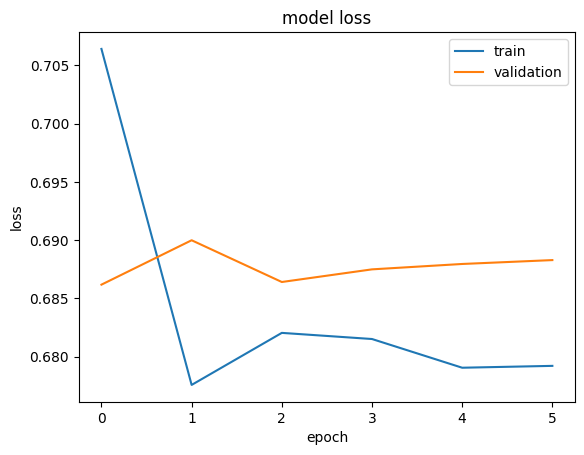

In [33]:
 # summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

![alt text](https://drive.google.com/uc?id=1Z-ceA9CQH5W4ecusIyzqLLJn2djR8vQb)

## Hyperparameter tuning for Early Stopping (Increasing the patience value)

In [24]:
# defining and compiling the model

# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [28]:
# increasing the patience and threshold value
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, mode='min')

In [29]:
# training the model for 100 epochs
model_history = model.fit(X_train, y_train, epochs=30, batch_size=128,validation_data=(X_valid,y_valid), callbacks=[early_stopping])

Epoch 1/30
13/13 [==============================] - 11s 747ms/step - loss: 0.6996 - accuracy: 0.5352 - val_loss: 0.7069 - val_accuracy: 0.5609
Epoch 2/30
13/13 [==============================] - 8s 616ms/step - loss: 0.6851 - accuracy: 0.5863 - val_loss: 0.6864 - val_accuracy: 0.5609
Epoch 3/30
13/13 [==============================] - 7s 556ms/step - loss: 0.6828 - accuracy: 0.5863 - val_loss: 0.6881 - val_accuracy: 0.5609
Epoch 4/30
13/13 [==============================] - 7s 573ms/step - loss: 0.6800 - accuracy: 0.5863 - val_loss: 0.6871 - val_accuracy: 0.5609
Epoch 5/30
13/13 [==============================] - 10s 794ms/step - loss: 0.6785 - accuracy: 0.5863 - val_loss: 0.6891 - val_accuracy: 0.5609
Epoch 6/30
13/13 [==============================] - 9s 679ms/step - loss: 0.6781 - accuracy: 0.5863 - val_loss: 0.6858 - val_accuracy: 0.5609
Epoch 7/30
13/13 [==============================] - 7s 532ms/step - loss: 0.6795 - accuracy: 0.5863 - val_loss: 0.6861 - val_accuracy: 0.5609
Epoc

In [30]:
y_pred = model.predict(X_valid)[:,0]
y_pred = np.where(y_pred<0.5, 0, 1)

23/23 [==============================] - 1s 46ms/step


In [31]:
# accuracy on validation set
y_pred = np.where(model.predict(X_valid)[:, 0] < 0.5, 0, 1)
print('Accuracy on validation set:', accuracy_score(y_valid, y_pred), '%')

23/23 [==============================] - 2s 69ms/step
Accuracy on validation set: 0.5609065155807366 %


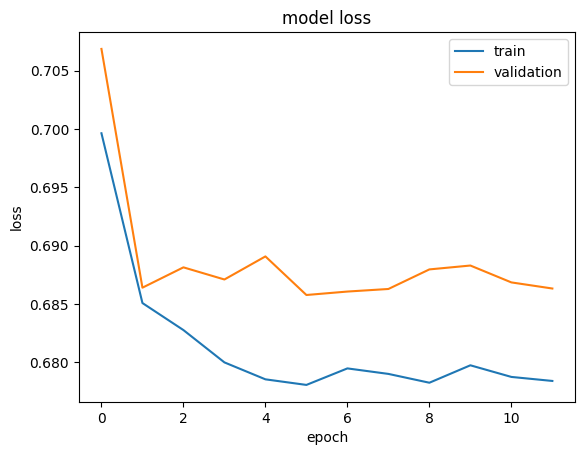

In [32]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()